In [3]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import numpy as np


Using TensorFlow backend.


In [5]:
num_classes = 3
img_rows, img_cols = 150, 150
batch_size = 16

train_data_dir="./dataset/train"
validation_data_dir="./dataset/test"

train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=30,
                                 width_shift_range=0.3,
                                 height_shift_range=0.3,
                                 horizontal_flip=True,
                                 fill_mode='nearest')
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                 target_size=(img_rows,img_cols),
                                                  batch_size=batch_size,
                                                  class_mode='categorical')

validation_generator=validation_datagen.flow_from_directory(validation_data_dir,
                                                           target_size=(img_rows,img_cols),
                                                           batch_size=batch_size,
                                                           class_mode='categorical')


                                 



Found 2152 images belonging to 3 classes.
Found 601 images belonging to 3 classes.


In [21]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import ELU
from keras.layers.core import Activation, Flatten, Dropout, Dense

In [22]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'same', kernel_initializer="he_normal",
                 input_shape = (img_rows, img_cols, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding = "same", kernel_initializer="he_normal", 
                 input_shape = (img_rows, img_cols, 3)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #2: second CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #3: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #4: third CONV => RELU => CONV => RELU => POOL
# layer set
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same", kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Block #5: first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #6: second set of FC => RELU layers
model.add(Dense(64, kernel_initializer="he_normal"))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #7: softmax classifier
model.add(Dense(num_classes, kernel_initializer="he_normal"))
model.add(Activation("softmax"))

print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
activation_9 (Activation)    (None, 150, 150, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 150, 150, 32)      9248      
_________________________________________________________________
activation_10 (Activation)   (None, 150, 150, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 32)       

In [23]:
from keras.optimizers import RMSprop, SGD
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./checkpoint/objcheck8.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)

callbacks=[checkpoint,earlystop,reduce_lr]
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(lr=0.0001),
             metrics=['accuracy'])

nb_train_samples=2152
nb_validation_samples=600
epochs=50

history=model.fit_generator(train_generator,
                           steps_per_epoch = nb_train_samples // batch_size,
                           epochs = epochs,
                           callbacks =callbacks,
                           validation_data=validation_generator,
                           validation_steps=nb_validation_samples // batch_size)




Epoch 1/50
 64/134 [=============>................] - ETA: 2:22 - loss: 1.3481 - accuracy: 0.5364

C:\Users\upjab\Anaconda3\envs\jabir\lib\site-packages\PIL\Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


134/134 [==============================] - 240s 2s/step - loss: 1.2771 - accuracy: 0.5698 - val_loss: 0.1904 - val_accuracy: 0.4764

Epoch 00001: val_loss improved from inf to 0.19041, saving model to ./checkpoint/objcheck8.h5
Epoch 2/50
134/134 [==============================] - 207s 2s/step - loss: 0.9965 - accuracy: 0.6545 - val_loss: 0.0806 - val_accuracy: 0.6940

Epoch 00002: val_loss improved from 0.19041 to 0.08061, saving model to ./checkpoint/objcheck8.h5
Epoch 3/50
134/134 [==============================] - 216s 2s/step - loss: 0.9469 - accuracy: 0.6798 - val_loss: 0.7144 - val_accuracy: 0.7880

Epoch 00003: val_loss did not improve from 0.08061
Epoch 4/50
134/134 [==============================] - 204s 2s/step - loss: 0.9128 - accuracy: 0.6845 - val_loss: 0.9252 - val_accuracy: 0.8308

Epoch 00004: val_loss did not improve from 0.08061
Epoch 5/50
134/134 [==============================] - 207s 2s/step - loss: 0.8469 - accuracy: 0.7079 - val_loss: 0.3646 - val_accuracy: 0.817

Found 601 images belonging to 3 classes.
Confusion Matrix
[[134  27  39]
 [  6 111  83]
 [ 18   9 174]]
Classification Report
              precision    recall  f1-score   support

    Accident       0.85      0.67      0.75       200
        Fire       0.76      0.56      0.64       200
      Knives       0.59      0.87      0.70       201

    accuracy                           0.70       601
   macro avg       0.73      0.70      0.70       601
weighted avg       0.73      0.70      0.70       601



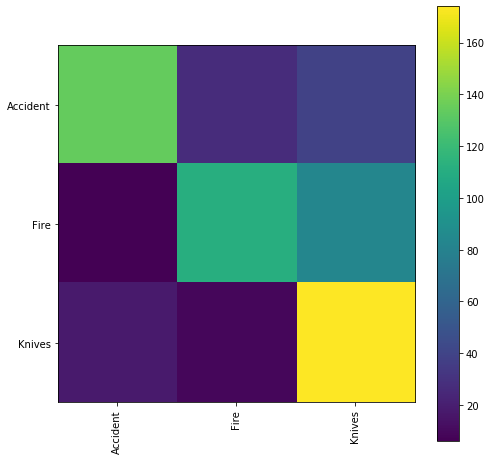

In [24]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

nb_train_samples = 2152
nb_validation_samples = 600

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [ ]:
#model_to_json

In [5]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Found 601 images belonging to 3 classes.
Confusion Matrix
[[190  10   0]
 [ 21 176   3]
 [ 26   8 167]]
Classification Report
              precision    recall  f1-score   support

    Accident       0.80      0.95      0.87       200
        Fire       0.91      0.88      0.89       200
      Knives       0.98      0.83      0.90       201

    accuracy                           0.89       601
   macro avg       0.90      0.89      0.89       601
weighted avg       0.90      0.89      0.89       601



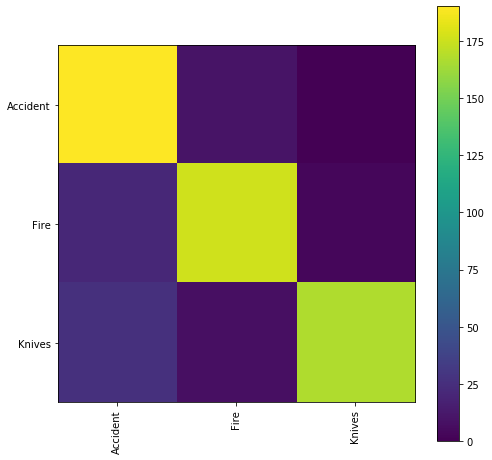

In [34]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

nb_train_samples = 2152
nb_validation_samples = 600

# We need to recreate our validation generator with shuffle = false
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

plt.figure(figsize=(8,8))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)

plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

In [11]:
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())
print(class_labels)

Found 601 images belonging to 3 classes.
{0: 'Accident', 1: 'Fire', 2: 'Knives'}


In [ ]:
#prediction

In [35]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os
import cv2
import numpy as np
from os import listdir
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (20, 60) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (20, 120) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 150, 150


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 10):
    path = "./dataset/test/" 
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size = 10)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [36]:
##single_image from webcam

In [68]:

import cv2
import numpy as np
from PIL import Image
from keras import models

#Load the saved model
model = models.load_model("./checkpoint/objcheck8.h5")
video = cv2.VideoCapture(0)

while True:
        _, frame = video.read()

        #Convert the captured frame into RGB
        im = Image.fromarray(frame, 'RGB')

        #Resizing into 128x128 because we trained the model with this image size.
        im = im.resize((150,150))
        img_array = np.array(im)

        #Our keras model used a 4D tensor, (images x height x width x channel)
        #So changing dimension 128x128x3 into 1x128x128x3 
        img_array = np.expand_dims(img_array, axis=0)

        #Calling the predict method on model to predict 'me' on the image
        prediction = int(model.predict(img_array)[0][0])
        print(prediction)
        #if prediction is 0, which means I am missing on the image, then show the frame in gray color.
        if prediction == 0:
                frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        cv2.imshow("Capturing", frame)
        key=cv2.waitKey(1)
        if key == ord('q'):
                break
video.release()
cv2.destroyAllWindows()

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
